In [8]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

import textwrap

import matplotlib.pyplot as plt

import numpy as np
import scipy

sw = stopwords.words("english")

In [3]:
small_tweets= ["sonoraninst_tweets.txt",
              "TheICCFGroup_tweets.txt",
              "CECSB_tweets.txt",
              "1000oregon_tweets.txt",
              "EarthShare_tweets.txt",
              "CRKeeper_tweets.txt",
              "ConservationNW_tweets.txt",
              "QLFNews_tweets.txt",
              "globalgreen_tweets.txt",
              "SustainableNW_tweets.txt" ]

medium_tweets = ["wildearthguard_tweets.txt",
                "WTA_hikers_tweets.txt",
                "ncascadeswa_tweets.txt",
                "PCTAssociation_tweets.txt",
                "PachamamaOrg_tweets.txt",
                "TreePeople_org_tweets.txt",
                "mohonkpreserve_tweets.txt",
                "PECPA_tweets.txt",
                "standearth_tweets.txt",
                 "earthisland_tweets.txt"
                ]

large_tweets = ["CeresNews_tweets.txt",
               "chesapeakebay_tweets.txt",
               "GrowNYC_tweets.txt",
               "RockyMtnInst_tweets.txt",
               "Earthjustice_tweets.txt",
               "rff_tweets.txt",
               "Waterkeeper_tweets.txt",
               "TPWFoundation_tweets.txt",
               "the_sca_tweets.txt",
               "ClimateReality_tweets.txt"]

small_MVVs = [
             "www_cecsb_org_about_our-mission.txt",
             "www_chattahoochee_org_about.txt",
             "www_conservationnw_org_about-us.txt",
             "Earthshare MVV.txt",
             "www_friends_org_about-usour-story.txt",
             "www_globalgreen_org.txt",
             "International Conservation MVV.txt",
             "www_qlf_org_about-qlf_mission-vision.txt",
             "www_sonoraninstitute_org_our-story_mission-vision.txt",
             "www_sustainablenorthwest_orgfocus.txt"]

medium_MVVs = ["www_earthisland_org_index_php_aboutUsabout-earth-island.txt",
                    "www_mohonkpreserve_org_what-we-do.txt",
                    "www_ncascades_org_discovernorth-cascades-institute.txt",
                    "www_pachamama_org_aboutmission.txt",
                    "Pacific Crest MVV.txt",
                    "www_pecpa_org_about.txt",
                    "www_stand_earth_aboutmission-and-principles.txt",
                    "www_treepeople_org_our-work.txt",
                    "www_wildearthguardians_org_about-us_mission-vision-history.txt",
                    "www_wta_org_our-workabout.txt"]

large_MVVs = ["www_cbf_org_about-cbf_our-mission.txt",
                    "www_ceres_orgabout-us.txt",
                    "www_climaterealityproject_orgour-mission.txt",
                    "www_earthjustice_orgabout.txt",
                    "www_grownyc_orgabout.txt",
                    "www_rff_org_about.txt",
                    "RMI MVV.txt",
                    "www_thesca_orgabout.txt",
                    "Texas Parks MVV.txt",
                    "www_waterkeeper_org_who-we-are.txt"]

In [4]:
##First I will read in the text files that contain all the values and their synonyms

values_files = ["achievement.txt",
                "benevolence.txt",
                "conformity.txt",
                "hedonism.txt",
                "power.txt",
                "security.txt",
                "self_direction.txt",
                "stimulation.txt",
                "tradition.txt",
                "universalism.txt"]

values_dict=dict()

for file in values_files: #For each text file
    with open(file, "r", encoding = "Latin-1") as infile: #Read in and tokenize the file
        key=file.replace("_synonyms.txt", "")
        words=infile.read()
        tokens=nltk.word_tokenize(words)
        
        values_dict[key] = set(t for t in tokens if t.isalpha()) #Add the list of synonyms into the dictionary using the overarching value as the key

In [5]:
def identify_values(file,v):  #Function will open a file, tokenize it, and store clean tokens in a list
    
    results=dict() #results will be stored in a dictionary
    
    open_file = open(file, "r", encoding = "Latin-1")
    
    read_file = open_file.read()
    
    tokenize_file = nltk.word_tokenize(read_file)
    
    clean_tokens = []
    
    for tokens in tokenize_file:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
            
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        results[value] = round(values_freq, 4) 
    
    
    return(results) ##Return the frequencies of each value, which are in a dictionary
            
    


In [6]:
def identify_synonyms(file, value):
    open_file = open(file, "r", encoding = "Latin-1")
    
    read_file = open_file.read()
    
    tokenize_file = nltk.word_tokenize(read_file)
    
    clean_tokens = []
    
    for tokens in tokenize_file:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
            
    for values in values_dict.keys():
    
        key=value
        
        matching_words = []
    
        for word in values_dict[value]:
            if word in clean_tokens:
                matching_words.append(word)
        
    return(matching_words)
        

## Values Frequencies in tweets

In [9]:
### Small Organizations ###

#Printing the values in the tweet files
for file in small_tweets:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

sonoraninst_tweets.txt

{'achievement.txt': 0.0089, 'benevolence.txt': 0.0196, 'conformity.txt': 0.0058, 'hedonism.txt': 0.0072, 'power.txt': 0.0094, 'security.txt': 0.0083, 'self_direction.txt': 0.0197, 'stimulation.txt': 0.0122, 'tradition.txt': 0.0049, 'universalism.txt': 0.0098}


TheICCFGroup_tweets.txt

{'achievement.txt': 0.0064, 'benevolence.txt': 0.0081, 'conformity.txt': 0.0112, 'hedonism.txt': 0.0021, 'power.txt': 0.0121, 'security.txt': 0.0122, 'self_direction.txt': 0.0129, 'stimulation.txt': 0.0046, 'tradition.txt': 0.0012, 'universalism.txt': 0.0123}


CECSB_tweets.txt

{'achievement.txt': 0.0082, 'benevolence.txt': 0.0164, 'conformity.txt': 0.0058, 'hedonism.txt': 0.0093, 'power.txt': 0.0091, 'security.txt': 0.01, 'self_direction.txt': 0.0173, 'stimulation.txt': 0.0176, 'tradition.txt': 0.0007, 'universalism.txt': 0.0189}


1000oregon_tweets.txt

{'achievement.txt': 0.0109, 'benevolence.txt': 0.0191, 'conformity.txt': 0.0108, 'hedonism.txt': 0.0047, 'power.txt': 0.0065, 

In [10]:
### Medium Organizations ###

#Printing the values in the tweet files
for file in medium_tweets:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

wildearthguard_tweets.txt

{'achievement.txt': 0.0077, 'benevolence.txt': 0.0133, 'conformity.txt': 0.0109, 'hedonism.txt': 0.002, 'power.txt': 0.0138, 'security.txt': 0.0247, 'self_direction.txt': 0.0158, 'stimulation.txt': 0.0137, 'tradition.txt': 0.0041, 'universalism.txt': 0.0123}


WTA_hikers_tweets.txt

{'achievement.txt': 0.0113, 'benevolence.txt': 0.0302, 'conformity.txt': 0.0052, 'hedonism.txt': 0.0128, 'power.txt': 0.005, 'security.txt': 0.0058, 'self_direction.txt': 0.0196, 'stimulation.txt': 0.0068, 'tradition.txt': 0.0021, 'universalism.txt': 0.0044}


ncascadeswa_tweets.txt

{'achievement.txt': 0.0093, 'benevolence.txt': 0.0132, 'conformity.txt': 0.0035, 'hedonism.txt': 0.0108, 'power.txt': 0.0052, 'security.txt': 0.0055, 'self_direction.txt': 0.0114, 'stimulation.txt': 0.0093, 'tradition.txt': 0.002, 'universalism.txt': 0.0076}


PCTAssociation_tweets.txt

{'achievement.txt': 0.0091, 'benevolence.txt': 0.0254, 'conformity.txt': 0.0067, 'hedonism.txt': 0.0081, 'power.txt'

In [11]:
### Large Tweets ###

#Printing the values in the tweet files
for file in large_tweets:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

CeresNews_tweets.txt

{'achievement.txt': 0.0198, 'benevolence.txt': 0.0092, 'conformity.txt': 0.0143, 'hedonism.txt': 0.0026, 'power.txt': 0.016, 'security.txt': 0.0155, 'self_direction.txt': 0.0241, 'stimulation.txt': 0.0287, 'tradition.txt': 0.0015, 'universalism.txt': 0.0354}


chesapeakebay_tweets.txt

{'achievement.txt': 0.0104, 'benevolence.txt': 0.0174, 'conformity.txt': 0.0066, 'hedonism.txt': 0.0047, 'power.txt': 0.0117, 'security.txt': 0.0154, 'self_direction.txt': 0.0167, 'stimulation.txt': 0.0126, 'tradition.txt': 0.0054, 'universalism.txt': 0.0142}


GrowNYC_tweets.txt

{'achievement.txt': 0.0063, 'benevolence.txt': 0.0224, 'conformity.txt': 0.0067, 'hedonism.txt': 0.0097, 'power.txt': 0.0048, 'security.txt': 0.016, 'self_direction.txt': 0.0187, 'stimulation.txt': 0.0127, 'tradition.txt': 0.0011, 'universalism.txt': 0.0082}


RockyMtnInst_tweets.txt

{'achievement.txt': 0.0177, 'benevolence.txt': 0.0086, 'conformity.txt': 0.0043, 'hedonism.txt': 0.001, 'power.txt': 0.0163

## Values Frequencies in MVVs

In [12]:
### Small Organizations ###

#Printing the values in mission/vision/values file
for file in small_MVVs:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

www_cecsb_org_about_our-mission.txt

{'achievement.txt': 0.0117, 'benevolence.txt': 0.0104, 'conformity.txt': 0.009, 'hedonism.txt': 0.0055, 'power.txt': 0.009, 'security.txt': 0.0104, 'self_direction.txt': 0.0255, 'stimulation.txt': 0.0304, 'tradition.txt': 0.0007, 'universalism.txt': 0.02}


www_chattahoochee_org_about.txt

{'achievement.txt': 0.0127, 'benevolence.txt': 0.019, 'conformity.txt': 0.0127, 'hedonism.txt': 0.0063, 'power.txt': 0.0063, 'security.txt': 0.019, 'self_direction.txt': 0.0222, 'stimulation.txt': 0.0127, 'tradition.txt': 0.0127, 'universalism.txt': 0.0159}


www_conservationnw_org_about-us.txt

{'achievement.txt': 0.0105, 'benevolence.txt': 0.0163, 'conformity.txt': 0.0096, 'hedonism.txt': 0.0019, 'power.txt': 0.0091, 'security.txt': 0.0196, 'self_direction.txt': 0.0148, 'stimulation.txt': 0.0077, 'tradition.txt': 0.0091, 'universalism.txt': 0.0129}


Earthshare MVV.txt

{'achievement.txt': 0.0136, 'benevolence.txt': 0.0136, 'conformity.txt': 0.0068, 'hedonism.tx

In [13]:
### Medium Organizations ###

#Printing the values in mission/vision/values file
for file in medium_MVVs:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

www_earthisland_org_index_php_aboutUsabout-earth-island.txt

{'achievement.txt': 0.0096, 'benevolence.txt': 0.0208, 'conformity.txt': 0.0192, 'hedonism.txt': 0.0016, 'power.txt': 0.0208, 'security.txt': 0.0112, 'self_direction.txt': 0.0352, 'stimulation.txt': 0.0384, 'tradition.txt': 0.0128, 'universalism.txt': 0.0208}


www_mohonkpreserve_org_what-we-do.txt

{'achievement.txt': 0.0061, 'benevolence.txt': 0.024, 'conformity.txt': 0.0074, 'hedonism.txt': 0.0061, 'power.txt': 0.008, 'security.txt': 0.0221, 'self_direction.txt': 0.0215, 'stimulation.txt': 0.0049, 'tradition.txt': 0.0086, 'universalism.txt': 0.0086}


www_ncascades_org_discovernorth-cascades-institute.txt

{'achievement.txt': 0.0108, 'benevolence.txt': 0.0431, 'conformity.txt': 0.0043, 'hedonism.txt': 0.0022, 'power.txt': 0.0086, 'security.txt': 0.0065, 'self_direction.txt': 0.028, 'stimulation.txt': 0.0129, 'tradition.txt': 0.0, 'universalism.txt': 0.0216}


www_pachamama_org_aboutmission.txt

{'achievement.txt': 0.011, '

In [14]:
### Large Organizations ###

#Printing the values in mission/vision/values file
for file in large_MVVs:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

www_cbf_org_about-cbf_our-mission.txt

{'achievement.txt': 0.0037, 'benevolence.txt': 0.0331, 'conformity.txt': 0.0074, 'hedonism.txt': 0.0, 'power.txt': 0.0074, 'security.txt': 0.0331, 'self_direction.txt': 0.0479, 'stimulation.txt': 0.011, 'tradition.txt': 0.0092, 'universalism.txt': 0.0221}


www_ceres_orgabout-us.txt

{'achievement.txt': 0.0337, 'benevolence.txt': 0.0132, 'conformity.txt': 0.0117, 'hedonism.txt': 0.0, 'power.txt': 0.0146, 'security.txt': 0.0102, 'self_direction.txt': 0.0381, 'stimulation.txt': 0.0395, 'tradition.txt': 0.0, 'universalism.txt': 0.0322}


www_climaterealityproject_orgour-mission.txt

{'achievement.txt': 0.0092, 'benevolence.txt': 0.0202, 'conformity.txt': 0.0037, 'hedonism.txt': 0.0, 'power.txt': 0.0221, 'security.txt': 0.0202, 'self_direction.txt': 0.0202, 'stimulation.txt': 0.0349, 'tradition.txt': 0.0037, 'universalism.txt': 0.1011}


www_earthjustice_orgabout.txt

{'achievement.txt': 0.0174, 'benevolence.txt': 0.0326, 'conformity.txt': 0.037, 'hed

## Cosine Similarity

In [15]:
def cosine_dist(a,b) :
    dist = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return(dist)

In [16]:
def values_similarity(file1,file2, v):
    
    org_name = file1.rstrip("tweets.txt")
    
    ###To calculate frequencies in tweets and store as vector###
    
    
    open_file1 = open(file1, "r", encoding = "Latin-1")
    
    read_file1 = open_file1.read()
    
    tokenize_file1 = nltk.word_tokenize(read_file1)
    
    clean_tokens = []
    
    for tokens in tokenize_file1:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
    
    a = [] #Store values freqs
    
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        file1_values_freq = round(values_freq, 4)
        
        a.append(file1_values_freq)
        
    
    
        
    ###To calculate frequences in MVVs as vector###
    
    
    open_file2 = open(file2, "r", encoding = "Latin-1")
    
    read_file2 = open_file2.read()
    
    tokenize_file2 = nltk.word_tokenize(read_file2)
    
    clean_tokens = []
    
    for tokens in tokenize_file2:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
    b= []
    
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        file2_values_freq = round(values_freq, 4) 
        
        b.append(file2_values_freq)
    
    
    
    return("The cosine distance between tweets and MVVs for" + " " + org_name + " " + "is" + " " + str(cosine_dist(a,b))) ##Return the frequencies of each value, which are in a dictionary

## Small Orgs

In [20]:
small_values_distances = [] 

for tweets, MVV in zip(small_tweets, small_MVVs):
    small_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [21]:
small_values_distances

['The cosine distance between tweets and MVVs for sonoraninst_ is 0.8866211910908003',
 'The cosine distance between tweets and MVVs for TheICCFGroup_ is 0.9072105499242719',
 'The cosine distance between tweets and MVVs for CECSB_ is 0.878034961935552',
 'The cosine distance between tweets and MVVs for 1000oregon_ is 0.7213674523660601',
 'The cosine distance between tweets and MVVs for EarthShare_ is 0.6599885803060995',
 'The cosine distance between tweets and MVVs for CRKeeper_ is 0.6258253708012392',
 'The cosine distance between tweets and MVVs for ConservationNW_ is 0.7609578274173477',
 'The cosine distance between tweets and MVVs for QLFNews_ is 0.9325509057153367',
 'The cosine distance between tweets and MVVs for globalgreen_ is 0.903826789532095',
 'The cosine distance between tweets and MVVs for SustainableNW_ is 0.863206762006737']

In [22]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in small_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
small_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    small_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.63 , 0.633, 0.636, 0.639, 0.642, 0.645, 0.648, 0.651, 0.654,
        0.657, 0.66 , 0.663, 0.666, 0.669, 0.672, 0.675, 0.678, 0.681,
        0.684, 0.687, 0.69 , 0.693, 0.696, 0.699, 0.702, 0.705, 0.708,
        0.711, 0.714, 0.717, 0.72 , 0.723, 0.726, 0.729, 0.732, 0.735,
        0.738, 0.741, 0.744, 0.747, 0.75 , 0.753, 0.756, 0.759, 0.762,
        0.765, 0.768, 0.771, 0.774, 0.777, 0.78 , 0.783, 0.786, 0.789,
        0.792, 0.795, 0.798, 0.801, 0.804, 0.807, 0.81 , 0.813, 0.816,
        0.819, 0.822, 0.825, 0.828, 0.831, 0.834, 0.8

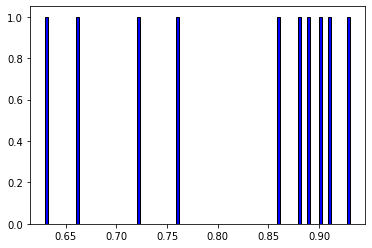

In [23]:
# matplotlib histogram of rounded distances
plt.hist(small_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [24]:
#Basic stats of distances
print(np.mean(small_rounded_distances))
print(np.std(small_rounded_distances))

0.8140000000000001
0.10565983153497835


In [25]:
y = np.array(small_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.7001325098447607


## Medium Orgs

In [26]:
medium_values_distances = [] 

for tweets, MVV in zip(medium_tweets, medium_MVVs):
    medium_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [27]:
medium_values_distances

['The cosine distance between tweets and MVVs for wildearthguard_ is 0.8681047904776686',
 'The cosine distance between tweets and MVVs for WTA_hikers_ is 0.8750106032344972',
 'The cosine distance between tweets and MVVs for ncascadeswa_ is 0.8699430733858964',
 'The cosine distance between tweets and MVVs for PCTAssociation_ is 0.7686067302152884',
 'The cosine distance between tweets and MVVs for PachamamaOrg_ is 0.8151516300656501',
 'The cosine distance between tweets and MVVs for TreePeople_org_ is 0.7898847128448261',
 'The cosine distance between tweets and MVVs for mohonkpreserve_ is 0.7479644343842562',
 'The cosine distance between tweets and MVVs for PECPA_ is 0.8448051594737386',
 'The cosine distance between tweets and MVVs for standearth_ is 0.861829748659632',
 'The cosine distance between tweets and MVVs for earthisland_ is 0.7797874737782536']

In [28]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in medium_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
medium_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    medium_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.75  , 0.7513, 0.7526, 0.7539, 0.7552, 0.7565, 0.7578, 0.7591,
        0.7604, 0.7617, 0.763 , 0.7643, 0.7656, 0.7669, 0.7682, 0.7695,
        0.7708, 0.7721, 0.7734, 0.7747, 0.776 , 0.7773, 0.7786, 0.7799,
        0.7812, 0.7825, 0.7838, 0.7851, 0.7864, 0.7877, 0.789 , 0.7903,
        0.7916, 0.7929, 0.7942, 0.7955, 0.7968, 0.7981, 0.7994, 0.8007,
        0.802 , 0.8033, 0.8046, 0.8059, 0.8072, 0.8085, 0.8098, 0.8111,
        0.8124, 0.8137, 0.815 , 0.8163, 0.8176, 0.8189, 0.8202, 0.8215,
        0.8228, 0.8241, 0.8254, 0.8267, 0.828 

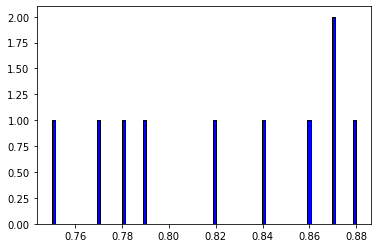

In [32]:
# matplotlib histogram of rounded distances
plt.hist(medium_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [29]:
#Basic stats of distances
print(np.mean(medium_rounded_distances))
print(np.std(medium_rounded_distances))

0.8230000000000001
0.045177427992306056


In [30]:
y = np.array(medium_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.2635942139804621


## Large Organizations

In [33]:
large_values_distances = [] 

for tweets, MVV in zip(large_tweets, large_MVVs):
    large_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [34]:
large_values_distances

['The cosine distance between tweets and MVVs for CeresNews_ is 0.7489072810686933',
 'The cosine distance between tweets and MVVs for chesapeakebay_ is 0.8670614266685107',
 'The cosine distance between tweets and MVVs for GrowNYC_ is 0.5795961566835953',
 'The cosine distance between tweets and MVVs for RockyMtnInst_ is 0.8359937704624576',
 'The cosine distance between tweets and MVVs for Earthjustice_ is 0.6159488393719895',
 'The cosine distance between tweets and MVVs for rff_ is 0.958821050012224',
 'The cosine distance between tweets and MVVs for Waterkeeper_ is 0.896896804431227',
 'The cosine distance between tweets and MVVs for TPWFoundation_ is 0.8555092259666036',
 'The cosine distance between tweets and MVVs for the_sca_ is 0.6056646235341085',
 'The cosine distance between tweets and MVVs for ClimateReality_ is 0.876801463060584']

In [35]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in large_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
large_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    large_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.58  , 0.5838, 0.5876, 0.5914, 0.5952, 0.599 , 0.6028, 0.6066,
        0.6104, 0.6142, 0.618 , 0.6218, 0.6256, 0.6294, 0.6332, 0.637 ,
        0.6408, 0.6446, 0.6484, 0.6522, 0.656 , 0.6598, 0.6636, 0.6674,
        0.6712, 0.675 , 0.6788, 0.6826, 0.6864, 0.6902, 0.694 , 0.6978,
        0.7016, 0.7054, 0.7092, 0.713 , 0.7168, 0.7206, 0.7244, 0.7282,
        0.732 , 0.7358, 0.7396, 0.7434, 0.7472, 0.751 , 0.7548, 0.7586,
        0.7624, 0.7662, 0.77  , 0.7738, 0.7776, 0.7814, 0.7852, 0.789 ,
        0.7928, 0.7966, 0.8004, 0.8042, 0.808 

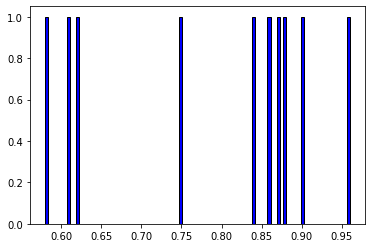

In [36]:
# matplotlib histogram of rounded distances
plt.hist(large_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [37]:
#Basic stats of distances
print(np.mean(large_rounded_distances))
print(np.std(large_rounded_distances))

0.787
0.13031116606031887


In [38]:
y = np.array(large_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.5674379198282534


## All organizations

In [39]:
combined_tweets = small_tweets + medium_tweets + large_tweets
combined_MVVs = small_MVVs + medium_MVVs + large_MVVs

In [40]:
combined_values_distances = [] 

for tweets, MVV in zip(combined_tweets, combined_MVVs):
    combined_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [41]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in combined_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
combined_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    combined_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        2., 0., 0., 0., 0., 3., 0., 0., 3., 0., 3., 0., 0., 1., 0., 0., 2.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.58  , 0.5838, 0.5876, 0.5914, 0.5952, 0.599 , 0.6028, 0.6066,
        0.6104, 0.6142, 0.618 , 0.6218, 0.6256, 0.6294, 0.6332, 0.637 ,
        0.6408, 0.6446, 0.6484, 0.6522, 0.656 , 0.6598, 0.6636, 0.6674,
        0.6712, 0.675 , 0.6788, 0.6826, 0.6864, 0.6902, 0.694 , 0.6978,
        0.7016, 0.7054, 0.7092, 0.713 , 0.7168, 0.7206, 0.7244, 0.7282,
        0.732 , 0.7358, 0.7396, 0.7434, 0.7472, 0.751 , 0.7548, 0.7586,
        0.7624, 0.7662, 0.77  , 0.7738, 0.7776, 0.7814, 0.7852, 0.789 ,
        0.7928, 0.7966, 0.8004, 0.8042, 0.808 

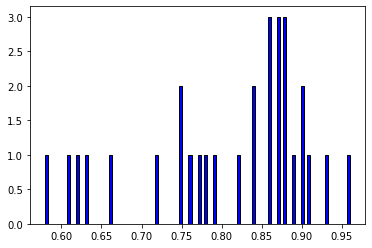

In [42]:
# matplotlib histogram of rounded distances
plt.hist(combined_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [43]:
#Basic stats of distances
print(np.mean(combined_rounded_distances))
print(np.std(combined_rounded_distances))

0.808
0.10146920715172657


In [44]:
y = np.array(combined_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.8599122461331324


## Identifying Outliers with IQR


In [45]:
import seaborn as sns

In [46]:
##Sort Data
sort = np.sort(combined_rounded_distances)

In [48]:
##Calculating quartiles

Q1 = np.percentile(sort, 25, interpolation = 'midpoint')
Q2 = np.percentile(sort, 50, interpolation = 'midpoint')
Q3 = np.percentile(sort, 75, interpolation = 'midpoint')

In [52]:
##Calculate IQR

IQR = Q3 - Q1
print(IQR)

0.125


In [53]:
##Lower limit and upper limit

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print("The lower limit for outliers is" + " " + str(low_lim))
print("The upper limit for outliers is" + " " + str(up_lim))

The lower limit for outliers is 0.5675
The upper limit for outliers is 1.0675


In [57]:
Q3

0.88

Using these limits, there are no outliers. However, the lowest 25% of data would be anything .755 and under. The highest 25% would be .88 and above. This can be used to discuss the lowest similarities